# 1 [Introduction](#Chapter1)

# 2 [Importing Libraries & Data](#Chapter2)

# 3 [Exploring the Dataset](#Chapter3)
###            - 3.1 [Visualizations](#Chapter3.1)

# 4 [Logistic Regression Model](#Chapter4)

# 5 [Gradient Boosted Trees Model](#Chapter5)

# 6 [Model Evaluation and Comparison](#Chapter6)

***

<a id="Chapter1"></a>
## 1. Introduction
In this project I use the modified version of popular credit dataset called South German Credit which was sourced from [UCI's ML repo](http://archive.ics.uci.edu/ml/datasets/South+German+Credit#). The data set contains 1000 observations with 20 predictor variables. I implement machine learning library, scikit-learn, to build and evaluate two methods (Logistic Regression and Gradient Boosted Decision Trees) to predict loan defaults. The attribute coding on this dataset has made some of the predictor variables difficult to work with or irrelevant; therefore, I do not work with all 20 predictor variables.

## Content
The predictor variables used in my models are:

**amount** : This is a continuous variable representing the loan amount in Deutsche Marks  

**age** : This is the age of the customer applying for the loan  

**Status** : This is a categorical variable which represents the **status** of the customer's checking account.
                        - When Status = 1: The customer does not have a checking account
                             - Status = 2: The customer has a checking account balance less than 0DM
                             - Status = 3: The customer has a checking account balance between 0 and 200DM
                             - Status = 4: The customer has a checking account balance greater than 200DM  

**Housing** : This is a categorical variable representing the customer's property type.
                        - When Housing = 1: The customer _rents_ their primary residence
                             - Housing = 2: The customer _owns_ their primary residence
                             - Housing = 3: The customer does not pay rent on & does not own their primary residence  

**Credit_History** : This is a categorical variable representing the customer's credit history.
                        - When Credit_History = 0: The customer has a history of delayed payments  
                             - Credit_History = 1: The customer has a critical account/other credits elsewhere  
                             - Credit_History = 2: The customer has not taken credit in past or credit has been paid back
                             - Credit_History = 3: The customer's existing credits paid back duly until now
                             - Credit_History = 4: The customer has paid back all previous credits on time with this bank

**job** : This is a categorical variable representing the type of job held by the customer.  
                        - When job = 1: The customer is unemployed or an unskilled non-resident
                             - job = 2: The customer is an unskilled resident
                             - job = 3: The customer is a skilled employee/official
                             - job = 4: The customer is a manager/self-employed/highly qualified employee
                             
                             
**employment_duration** : This is a categorical variable representing the customer's employment duration.
                        - When employment_duration = 1: The customer is unemployed
                             - employment_duration = 2: The customer has been employed for less than 1 year
                             - employment_duration = 3: The customer has been employed between 1 and 4 years
                             - employment_duration = 4: The customer has been employed between 4 and 7 years
                             - employment_duration = 5: The customer has been employed for more than 7 years
                             
**savings** : This is a categorical variable representing the customer's saving account balance.
                        - When savings = 1: The customer does not have a savings account (or it is unknown)
                             - savings = 2: The customer has less than 100DM in their savings
                             - savings = 3: The customer has between 100DM and 500DM in their savings
                             - savings = 4: The customer has between 500DM and 1000DM in their savings
                             - savings = 5: The customer has more than 1000DM in their savings
                             
**credit_risk** : This is a binary variable representing whether or not the customer is considered a good risk.
                        - When credit_risk = 0: The customer is a bad credit risk (default)
                             - credit_risk = 1: The customer is a good credit risk (non-default)

<a id="Chapter2"></a>
## 2. Importing libraries & data

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# Importing the data
df = pd.read_csv("C:/Users/camer/OneDrive/Desktop/Python_Fin_Projects/SouthGermanCredit.asc",sep=' ')

<a id="Chapter3"></a>
## 3. Exploring the Dataset
 - Check the datatypes present
 - Inspect the top few rows
 - Check for nulls
 - Make any adjustments

In [2]:
# Begin inspecting the data
print(df.dtypes)
df.head()

laufkont    int64
laufzeit    int64
moral       int64
verw        int64
hoehe       int64
sparkont    int64
beszeit     int64
rate        int64
famges      int64
buerge      int64
wohnzeit    int64
verm        int64
alter       int64
weitkred    int64
wohn        int64
bishkred    int64
beruf       int64
pers        int64
telef       int64
gastarb     int64
kredit      int64
dtype: object


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
# All the data is represented as int datatype but headers are in German - I will convert to English using guide on UCI website
list1 = ['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate',
         'personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans'
        ,'housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
df.columns = list1
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


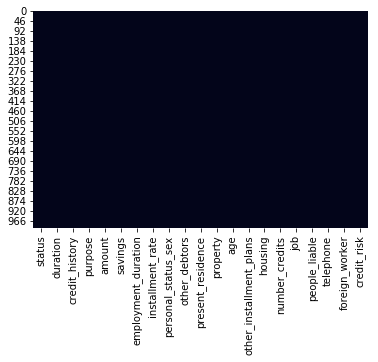

In [4]:
# Checking for null values - looks like there are none
sns.heatmap(df.isnull(),cbar=False)

<a id="Chapter3.1"></a>
### 3.1 Visualizations
 - Try to better understand the distributions of the continuous variables and relationship with credit risk

C:\Users\camer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


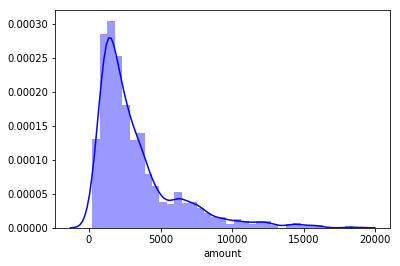

In [5]:
# Plot the distribution of loan amounts
sns.distplot(df.amount,bins='auto',color='b')

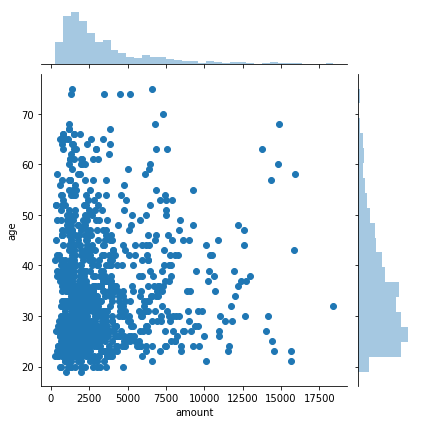

In [6]:
# Visualize distribution of loan amount vs age
sns.jointplot(x='amount',y='age',data=df)

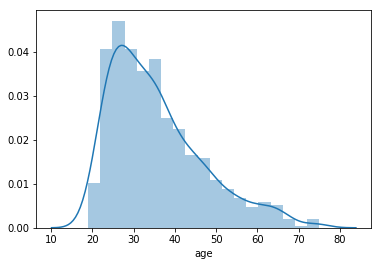

In [7]:
sns.distplot(df.age,bins='auto')

In [8]:
# Create a cross table of housing situation, credit risk, and current account balance (status)
print(pd.crosstab(df['housing'], df['credit_risk'], df['status'], aggfunc='mean'))

credit_risk         0         1
housing                        
1            1.785714  2.678899
2            1.978495  2.926136
3            1.772727  2.682540


4    394
1    274
2    269
3     63
Name: status, dtype: int64


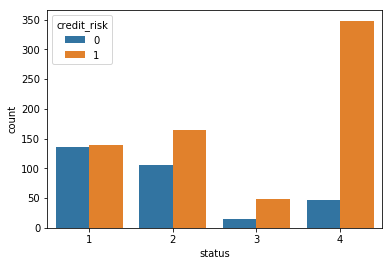

In [9]:
print(df['status'].value_counts())
sns.countplot(x='status',hue='credit_risk',data=df)

In [10]:
# Modify the features so they are all binary
df.drop(df[df.status == 1].index, inplace=True) # Analysing only people with checking accounts
df.drop(df[df.housing == 3].index, inplace=True) # Analysing only people who rent or own a property.
df = df.merge(pd.get_dummies(df.status, prefix='Status', drop_first= True), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.housing, prefix='Housing', drop_first= True), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.credit_history, prefix='Credit_History', drop_first= True), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.job, prefix='job', drop_first= True), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.employment_duration, prefix='employment_duration', drop_first= True), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.savings, prefix='savings', drop_first= True), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.credit_risk, prefix='credit_risk'), left_index=True, right_index=True)
df.rename(columns={'credit_risk_0':'bad_credit_risk'}, inplace=True)

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
status,658.0,3.183891,0.940181,2.0,2.0,4.0,4.0,4.0
duration,658.0,20.022796,11.594667,4.0,12.0,18.0,24.0,72.0
credit_history,658.0,2.621581,1.071829,0.0,2.0,2.0,4.0,4.0
purpose,658.0,3.004559,2.790773,0.0,1.0,3.0,3.0,10.0
amount,658.0,3123.655015,2668.220540,250.0,1361.0,2249.0,3832.0,18424.0
savings,658.0,2.273556,1.617428,1.0,1.0,1.0,4.0,5.0
employment_duration,658.0,3.366261,1.173484,1.0,3.0,3.0,4.0,5.0
installment_rate,658.0,2.927052,1.121601,1.0,2.0,3.0,4.0,4.0
personal_status_sex,658.0,2.696049,0.720656,1.0,2.0,3.0,3.0,4.0
other_debtors,658.0,1.132219,0.464078,1.0,1.0,1.0,1.0,3.0


In [12]:
# Keeping only the dummy variables & continuous (age/amount)
del df['status']
del df['duration']
del df['credit_history']
del df['purpose']
del df['savings']
del df['employment_duration']
del df['installment_rate']
del df['personal_status_sex']
del df['other_debtors']
del df['present_residence']
del df['property']
del df['other_installment_plans']
del df['housing']
del df['number_credits']
del df['job']
del df['people_liable']
del df['telephone']
del df['foreign_worker']
del df['credit_risk']
del df['credit_risk_1']

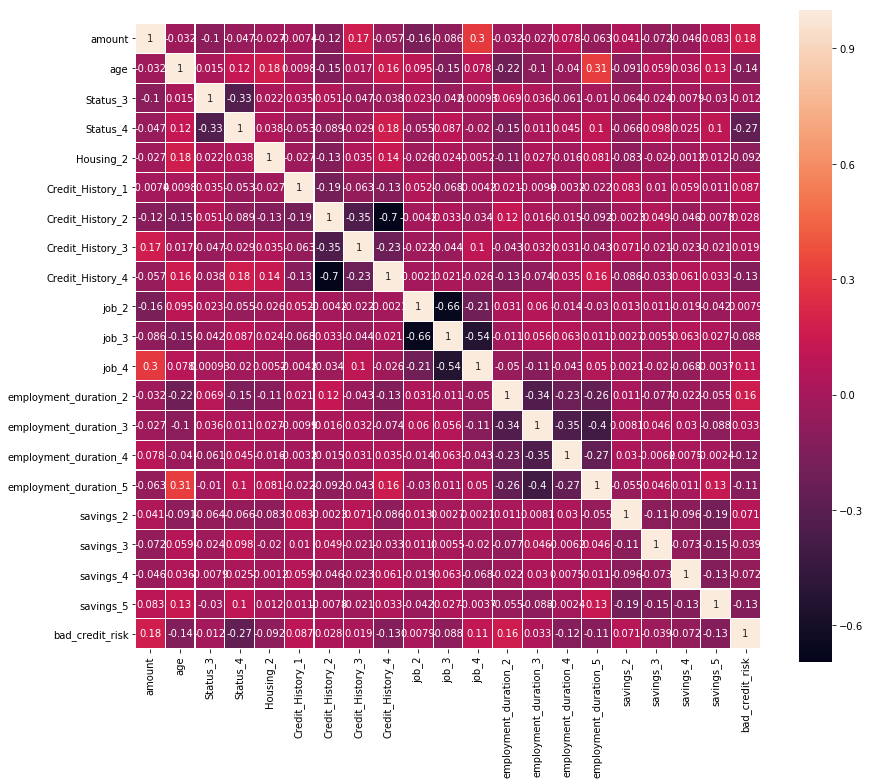

In [13]:
# Visualize the relationships between the variables
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [14]:
# Check how many defaults/non-defaults
df['bad_credit_risk'].value_counts()

0    516
1    142
Name: bad_credit_risk, dtype: int64

<a id="Chapter4"></a>
## 4. Logistic Regression Model
 - Import the necessary sklearn functions
 - Split the data into train/test sets
 - Fit the model on the training data
 - Predict credit risk using Logistic Regression
 - Improve model accuracy through undersampling

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = np.array(df.drop('bad_credit_risk',axis=1)) # Features
y = np.array(df['bad_credit_risk']) # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=43) # 60/40 split train/test data

In [16]:
logreg = LogisticRegression(solver='lbfgs',max_iter=5000).fit(X_train, np.ravel(y_train))
print(logreg.coef_)
preds = logreg.predict_proba(X_test)
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_bad_risk'])
true_df = pd.DataFrame(y_test).head()
# Compare true default status vs predicted probablity of default
print(pd.concat([true_df.reset_index(drop=True),preds_df],axis=1)) 

[[ 1.25468310e-04 -2.34110396e-02 -1.64791720e-01 -1.49191627e+00
  -7.88005370e-02  1.25668557e-01 -1.61451257e-01 -1.08001838e-02
  -3.71044957e-01 -1.12112147e-01 -7.71286852e-02  2.15281663e-01
   4.23456333e-01  5.30103525e-01 -1.00767186e+00 -9.66303906e-02
   1.85112179e-01  1.18659389e-02 -9.66430311e-02 -5.46194601e-01]]
   0  prob_bad_risk
0  0       0.067163
1  0       0.175581
2  0       0.030768
3  0       0.064309
4  0       0.210747


In [17]:
# Import functions to evaluate model accuracy
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve, confusion_matrix, classification_report, roc_curve, roc_auc_score
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_bad_risk'])
preds_df['loan_status'] = preds_df['prob_bad_risk'].apply(lambda x: 1 if x > 0.5 else 0)
print("LogReg Model Predicted loan status given threshold of 0.5")
print(preds_df['loan_status'].value_counts())
target_names = ['Non-Default','Default']
print("Classification Report")
print(classification_report(y_test, preds_df['loan_status'], target_names = target_names))

LogReg Model Predicted loan status given threshold of 0.5
0    238
1     26
Name: loan_status, dtype: int64
Classification Report
              precision    recall  f1-score   support

 Non-Default       0.83      0.92      0.87       215
     Default       0.35      0.18      0.24        49

   micro avg       0.78      0.78      0.78       264
   macro avg       0.59      0.55      0.56       264
weighted avg       0.74      0.78      0.76       264



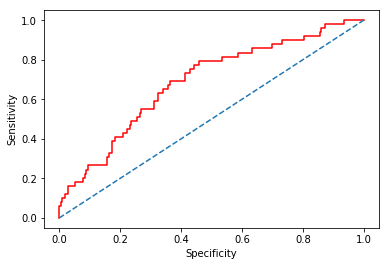

AUC Score: 
0.6865685809207405


In [18]:
# Plot the roc curve to illustrate model's diagnostic ability given varying threshold
prob_default = preds[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, c='r')
plt.plot([0,1],[0,1],ls='--')
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.show()
# AUC score measures the model's lift which can be used as a metric to compare competing models
auc = roc_auc_score(y_test, prob_default)
print("AUC Score: ")
print(auc)

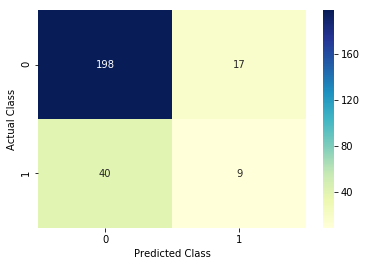

In [19]:
# Confusion Matrix
conf_mat = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,preds_df['loan_status'])), annot=True, cmap='YlGnBu',fmt='g')
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [20]:
preds_df['loan_status'] = preds_df['prob_bad_risk'].apply(lambda x: 1 if x > 0.4 else 0) # lower the threshold value

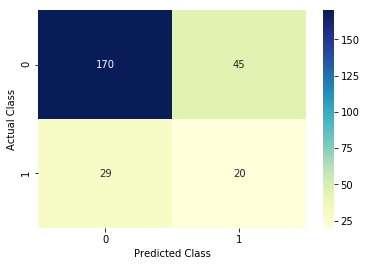

In [21]:
# After lowering default threshold
conf_mat = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,preds_df['loan_status'])), annot=True, cmap='YlGnBu',fmt='g')
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

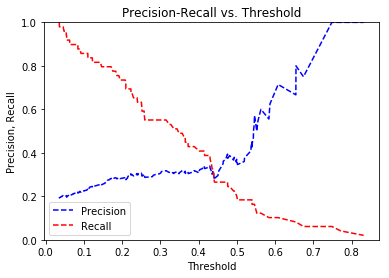

In [22]:
# Calculate optimal threshold value
precision, recall, thresholds = precision_recall_curve(y_test, prob_default) 
plt.title("Precision-Recall vs. Threshold")
plt.plot(thresholds, precision[:-1],"b--",label='Precision')
plt.plot(thresholds, recall[:-1],"r--",label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc='lower left')
plt.ylim([0,1])
plt.show()

#### It is clear that this logistic regression model is not effective. This may be a result of the data processing.

In [23]:
# Undersampling to see if correcting the imbalance in target variable data will improve model
minority_class_len = len(df[df['bad_credit_risk']==1])
majority_class_indices = df[df['bad_credit_risk']==0].index
print(minority_class_len)
print(len(majority_class_indices))

142
516


In [24]:
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
print(len(random_majority_indices))
minority_class_indices = df[df['bad_credit_risk']==1].index
print(len(minority_class_indices))

142
142


In [25]:
undersample_indices = np.concatenate([minority_class_indices,random_majority_indices])
undersample = df.loc[undersample_indices]

In [26]:
# Re-split the new balanced dataset and fit Log Reg model to new training set
X = undersample.loc[:, df.columns!='bad_credit_risk']
y = undersample.loc[:, df.columns=='bad_credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=99)
logreg = LogisticRegression(solver='lbfgs',max_iter=5000).fit(X_train, np.ravel(y_train))

In [27]:
preds = logreg.predict_proba(X_test)
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_bad_risk'])
preds_df['loan_status'] = preds_df['prob_bad_risk'].apply(lambda x: 1 if x > 0.44 else 0)
print(preds_df['loan_status'].value_counts())
print(classification_report(y_test, preds_df['loan_status'], target_names = target_names))

1    66
0    48
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.71      0.63      0.67        54
     Default       0.70      0.77      0.73        60

   micro avg       0.70      0.70      0.70       114
   macro avg       0.70      0.70      0.70       114
weighted avg       0.70      0.70      0.70       114



#### The undersampling improved the model's ability to correctly predict defaults as shown by increase in default recall

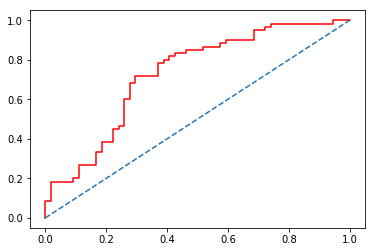

0.7271604938271605


In [28]:
# Plot new roc curve and compare auc values
prob_default = preds_df['prob_bad_risk']
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, c='r')
plt.plot([0,1],[0,1],ls='--')
plt.show()
auc = roc_auc_score(y_test, prob_default)
print(auc)

#### Improved AUC value shows model improvement. This is supported below by the increased precision for same threshold.

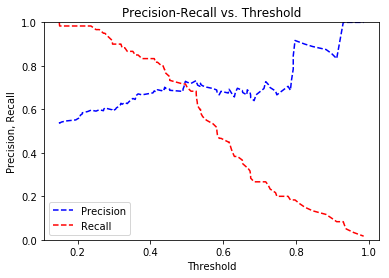

In [29]:
precision, recall, thresholds = precision_recall_curve(y_test, prob_default) 
plt.title("Precision-Recall vs. Threshold")
plt.plot(thresholds, precision[:-1],"b--",label='Precision')
plt.plot(thresholds, recall[:-1],"r--",label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc='lower left')
plt.ylim([0,1])
plt.show()

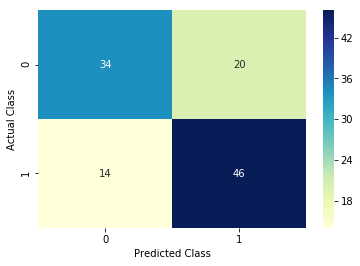

In [30]:
conf_mat = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,preds_df['loan_status'])), annot=True, cmap='YlGnBu',fmt='g')
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

<a id="Chapter5"></a>
## 5. Gradient Boosted Trees Model
 - Utilize xgboost to fit a gradient boosted tree model to the undersampled dataset
 - Compare model performance between Logistic Regression (LR) and Gradient Boosted Trees (GBT)

In [31]:
import xgboost as xgb
gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))
gbt_preds = gbt.predict_proba(X_test)
gbt_preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_bad_risk'])
gbt_preds_df['loan_status'] = gbt_preds_df['prob_bad_risk'].apply(lambda x: 1 if x > 0.43 else 0)
print(gbt_preds_df['prob_bad_risk'].describe())
print(gbt_preds_df['loan_status'].value_counts())

count    114.000000
mean       0.534999
std        0.377227
min        0.000347
25%        0.141112
50%        0.602534
75%        0.919236
max        0.996815
Name: prob_bad_risk, dtype: float64
1    68
0    46
Name: loan_status, dtype: int64


In [32]:
portfolio = pd.concat([pd.DataFrame(gbt_preds[:,1],columns=['gbt_prob_default']), pd.DataFrame(preds[:,1],columns=['lr_prob_default']) , df['amount'].reset_index(drop=True)], axis=1)
portfolio.head()

,gbt_prob_default,lr_prob_default,amount
0,0.980756,0.633464,841
1,0.951516,0.296264,1098
2,0.102179,0.439344,3758
3,0.178858,0.213311,7582
4,0.980879,0.897668,3213


In [33]:
# Assuming Loss Given Default is 20% -> Calculate the Expected Loss for each method
portfolio['gbt_exp_loss'] = portfolio['gbt_prob_default'] * portfolio['amount'] * 0.2
portfolio['lr_exp_loss'] = portfolio['lr_prob_default'] * portfolio['amount'] * 0.2
print("GBT Expected Loss: ", np.sum(portfolio['gbt_exp_loss']))
print("LR Expected Loss: ", np.sum(portfolio['lr_exp_loss']))

GBT Expected Loss:  33867.54377757899
LR Expected Loss:  32374.642626255492


In [34]:
gbt_preds = gbt.predict(X_test)
print(classification_report(y_test, gbt_preds, target_names=target_names)) 

              precision    recall  f1-score   support

 Non-Default       0.56      0.54      0.55        54
     Default       0.60      0.62      0.61        60

   micro avg       0.58      0.58      0.58       114
   macro avg       0.58      0.58      0.58       114
weighted avg       0.58      0.58      0.58       114



{'Status_4': 42, 'amount': 376, 'age': 228, 'Credit_History_2': 19, 'employment_duration_3': 41, 'Credit_History_3': 4, 'Credit_History_4': 25, 'employment_duration_2': 14, 'job_3': 32, 'job_4': 7, 'savings_5': 7, 'savings_3': 3, 'job_2': 15, 'Housing_2': 18, 'employment_duration_4': 6, 'employment_duration_5': 4, 'savings_2': 11, 'savings_4': 1, 'Status_3': 5}


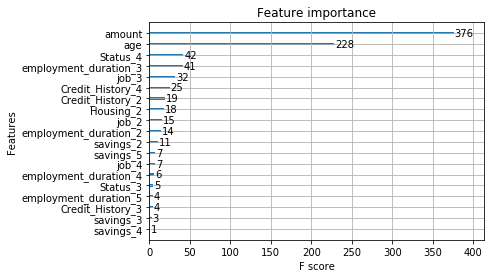

In [35]:
print(gbt.get_booster().get_score(importance_type = 'weight'))
xgb.plot_importance(gbt, importance_type = 'weight')

In [36]:
X2 = np.array(X.drop(['savings_5','savings_3','Credit_History_3','employment_duration_5'
                     ,'Status_3'],axis=1)) # Remove features w/ low weighting (<=5)
y = undersample.loc[:, df.columns=='bad_credit_risk']
X2_train, X2_test, y_train, y_test = train_test_split(X2,y,test_size=0.4,random_state=99)

In [37]:
gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))
gbt2_preds = gbt2.predict(X2_test)

In [38]:
print(classification_report(y_test, gbt_preds, target_names=target_names))
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.56      0.54      0.55        54
     Default       0.60      0.62      0.61        60

   micro avg       0.58      0.58      0.58       114
   macro avg       0.58      0.58      0.58       114
weighted avg       0.58      0.58      0.58       114

              precision    recall  f1-score   support

 Non-Default       0.51      0.48      0.50        54
     Default       0.56      0.58      0.57        60

   micro avg       0.54      0.54      0.54       114
   macro avg       0.53      0.53      0.53       114
weighted avg       0.53      0.54      0.53       114



#### Removing low-weighted features had negative effect on model. Stick to original feature set.

In [39]:
# Cross Validation
n_folds = 4
early_stop = 10
params = {'objective':'binary:logistic', 'seed':43,'eval_metric':'auc'}
DTrain = xgb.DMatrix(X_train, label= y_train)
gbt2_cv_score = xgb.cv(params, DTrain, num_boost_round=500, nfold=n_folds)
print(gbt2_cv_score)

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.895784       0.003535       0.675712      0.041454
1          0.926411       0.016201       0.683115      0.029730
2          0.944561       0.016780       0.649114      0.017628
3          0.959554       0.008678       0.662436      0.010775
4          0.971656       0.008185       0.661836      0.026950
5          0.974268       0.005303       0.652794      0.038002
6          0.984995       0.001500       0.669661      0.034846
7          0.987946       0.003000       0.663356      0.034806
8          0.990044       0.003363       0.661975      0.039162
9          0.993245       0.003228       0.665419      0.033776
10         0.995339       0.001394       0.669098      0.039055
11         0.995987       0.001486       0.665083      0.050005
12         0.997351       0.000268       0.664421      0.046923
13         0.998336       0.000590       0.659949      0.046943
14         0.998893       0.000558      

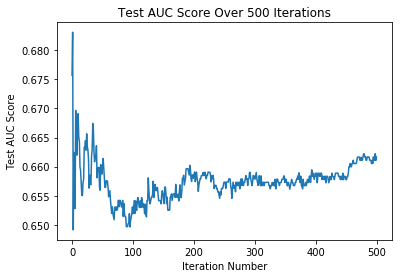

In [40]:
plt.plot(gbt2_cv_score['test-auc-mean'])
plt.title('Test AUC Score Over 500 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

#### Overfitting occurs very quickly

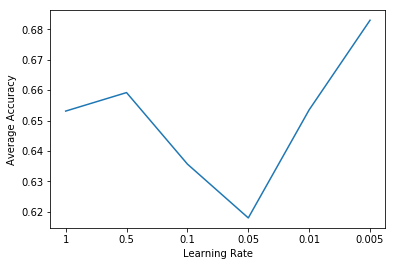

In [41]:
from sklearn.model_selection import cross_val_score
learning_rates = [1,0.5,0.1,0.05,0.01,0.005]
cv_score_avg =[]
for num in learning_rates:
    
    gbt2 = xgb.XGBClassifier(learning_rate=num, max_depth=7).fit(X_train,np.ravel(y_train))
    cv_scores = (cross_val_score(gbt2, X_train, np.ravel(y_train), cv=4))
    cv_score_avg.append(cv_scores.mean())
plt.plot(cv_score_avg)
plt.xticks(np.arange(6), learning_rates)
plt.xlabel('Learning Rate')
plt.ylabel('Average Accuracy')
plt.show()

In [42]:
# Refit model with new learning rate
gbt = xgb.XGBClassifier(learning_rate=0.05,max_depth=7).fit(X_train,np.ravel(y_train))
gbt_preds = gbt.predict_proba(X_test)
gbt_preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_bad_risk'])
gbt_preds_df['loan_status'] = gbt_preds_df['prob_bad_risk'].apply(lambda x: 1 if x > 0.43 else 0)
print(gbt_preds_df['prob_bad_risk'].describe())
print(gbt_preds_df['loan_status'].value_counts())

count    114.000000
mean       0.520186
std        0.297218
min        0.020946
25%        0.237571
50%        0.592630
75%        0.790717
max        0.970362
Name: prob_bad_risk, dtype: float64
1    70
0    44
Name: loan_status, dtype: int64


<a id="Chapter6"></a>
## 6. Model Evaluation and Method Comparison
 - Run diagnostics on the different models
 - Compare the performance metrics between the two ML methods
 - Calculate the maximum value from all model configurations in Deutsche Marks

In [43]:
# Model Evaluation and Method Comparison
# Compare LogReg and Gradient Boosted Tree Classification reports
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))
print(classification_report(y_test, gbt_preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.71      0.63      0.67        54
     Default       0.70      0.77      0.73        60

   micro avg       0.70      0.70      0.70       114
   macro avg       0.70      0.70      0.70       114
weighted avg       0.70      0.70      0.70       114

              precision    recall  f1-score   support

 Non-Default       0.64      0.52      0.57        54
     Default       0.63      0.73      0.68        60

   micro avg       0.63      0.63      0.63       114
   macro avg       0.63      0.63      0.62       114
weighted avg       0.63      0.63      0.63       114



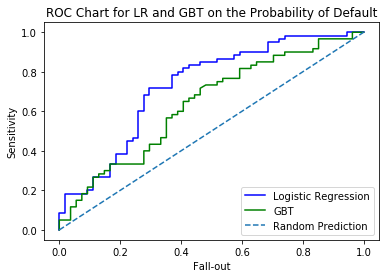

In [44]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, preds[:,1])
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, gbt_preds_df['prob_bad_risk'])

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

#### The lift is greater for the Log Reg model which implies a more accurate model.

In [45]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, preds[:,1]))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, gbt_preds_df['prob_bad_risk']))

Logistic Regression AUC Score: 0.73
Gradient Boosted Tree AUC Score: 0.64


In [46]:
from sklearn.calibration import calibration_curve
fraction_of_positives_lr, mean_predicted_value_lr = calibration_curve(y_test, preds[:,1], n_bins=10)
fraction_of_positives_gbt, mean_predicted_value_gbt = calibration_curve(y_test, gbt_preds_df['prob_bad_risk'], n_bins=10)

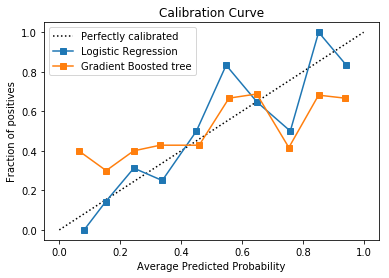

In [47]:
# Create the calibration curve plot with the guideline
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_predicted_value_lr, fraction_of_positives_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_predicted_value_gbt, fraction_of_positives_gbt,
         's-', label='%s' % 'Gradient Boosted tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

#### The Log Reg model tracks the perfect calibration line much closer than the GBT model - especially for lower probabilities. Note it is more costly for the model to be above the calibration line than below it. This is because when the model is above the calibration line, the percentage of defaults is greater than the model's predicted percentage of defaults and so we are approving loans that will be defaulted on. When the model is below the calibration line it means we are not approving enough loans and are missing out on profit but are not taking on any extra risk.

In [48]:
test_pred_df_gbt = pd.concat([y_test.reset_index(drop=True), gbt_preds_df], axis=1)
test_pred_df_lr = pd.concat([y_test.reset_index(drop=True), preds_df], axis=1)

In [49]:
# Calculate bad rate for each method - bad rate is percentage of accepted loans that defaulted on
accepted_loans_gbt = test_pred_df_gbt[test_pred_df_gbt['loan_status']==0]
accepted_loans_lr = test_pred_df_lr[test_pred_df_lr['loan_status']==0]
print("GBT Model Bad Rate:")
print(np.sum(accepted_loans_gbt['bad_credit_risk']) / accepted_loans_gbt['bad_credit_risk'].count())
print("LR Model Bad Rate:")
print(np.sum(accepted_loans_lr['bad_credit_risk']) / accepted_loans_lr['bad_credit_risk'].count())

GBT Model Bad Rate:
0.36363636363636365
LR Model Bad Rate:
0.2916666666666667


#### This tells us that 29% of loans the Logistic Regression model approves will be defaulted on. This is not very good but it is better than the GBT model's 36% bad rate. Therefore we continue with just the LR model.

In [50]:
test_pred_df_lr.head()

,bad_credit_risk,prob_bad_risk,loan_status
0,0,0.633464,1
1,0,0.296264,0
2,1,0.439344,0
3,0,0.213311,0
4,1,0.897668,1


In [51]:
accept_rates = [1.0,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05]
thresholds = []
bad_rates = []
num_accepted = []
# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df['prob_bad_risk'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(preds_df['prob_bad_risk'], rate).round(3))
    # Reassign the loan_status value using the threshold
    test_pred_df_lr['loan_status'] = test_pred_df_lr['prob_bad_risk'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans_lr = test_pred_df_lr[test_pred_df_lr['loan_status'] == 0]
    # Calculate and append the number of accepted loans for chosen threshold
    num_accepted.append(len(test_pred_df_lr[test_pred_df_lr['prob_bad_risk'] < thresh]))
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans_lr['bad_credit_risk']) / len(accepted_loans_lr['bad_credit_risk'])).round(3))

In [53]:
# Create a data frame of the strategy table
df1 = pd.read_csv("C:/Users/camer/OneDrive/Desktop/Python_Fin_Projects/SouthGermanCredit.asc",sep=' ')
df1.columns = list1
df1.drop(df1[df1.status == 1].index, inplace=True)
df1.drop(df1[df1.housing == 3].index, inplace=True)
avg_loan_amnt = np.mean(df1['amount'])

strat_df = pd.DataFrame(list(zip(accept_rates, thresholds, bad_rates, num_accepted)), 
                        columns = ['Acceptance Rate','Threshold','Bad Rate','# of Loans Accepted'])
strat_df['Avg Loan Amount'] = avg_loan_amnt
strat_df['Estimated Value'] = ((strat_df['# of Loans Accepted'] * (1 - strat_df['Bad Rate'])) * strat_df['Avg Loan Amount']) - (strat_df['# of Loans Accepted'] * strat_df['Bad Rate'] * strat_df['Avg Loan Amount'])

# Print the entire table
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate  # of Loans Accepted  \
0              1.00      0.986     0.522                  113   
1              0.95      0.903     0.509                  108   
2              0.90      0.796     0.480                  102   
3              0.85      0.749     0.495                   97   
4              0.80      0.699     0.484                   91   
5              0.75      0.666     0.471                   85   
6              0.70      0.631     0.462                   80   
7              0.65      0.603     0.446                   74   
8              0.60      0.569     0.412                   68   
9              0.55      0.531     0.381                   63   
10             0.50      0.507     0.333                   57   
11             0.45      0.484     0.333                   51   
12             0.40      0.436     0.283                   46   
13             0.35      0.394     0.250                   40   
14             0.30      

C:\Users\camer\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\camer\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


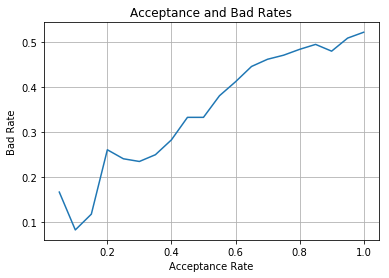

In [54]:
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

C:\Users\camer\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


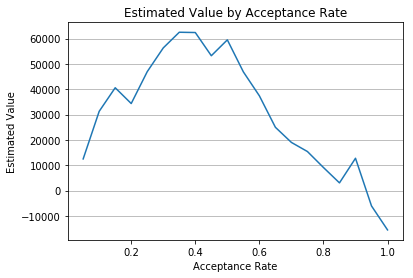

In [55]:
# Create a line plot of estimated value
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

In [56]:
# Print the row with the max estimated value
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])

    Acceptance Rate  Threshold  Bad Rate  # of Loans Accepted  \
13             0.35      0.394      0.25                   40   

    Avg Loan Amount  Estimated Value  
13      3123.655015     62473.100304  


#### This shows us the most profitable configuration of the loan model. We should have a 35% acceptance rate which implies a default risk threshold of 39% and means that 25% of the accepted loans will be defaults. This produces value of 62,473 DM